In [2]:
%matplotlib inline
from IPython.core.display import display
import pickle
import pandas
import numpy

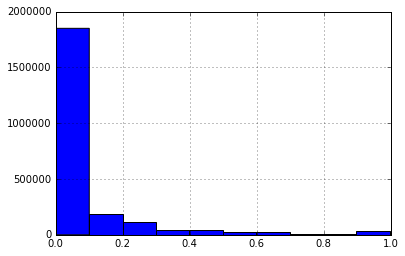

In [55]:
pandas.read_csv('submit_clique_dtree.csv')['is_duplicate'].hist()

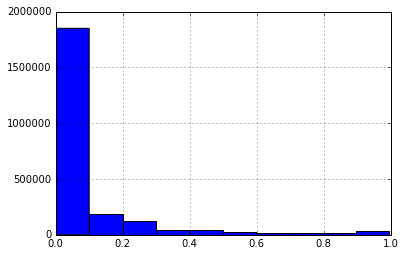

In [50]:
pandas.read_csv('submit_clique_dtree_no_cnum.csv')['is_duplicate'].hist()

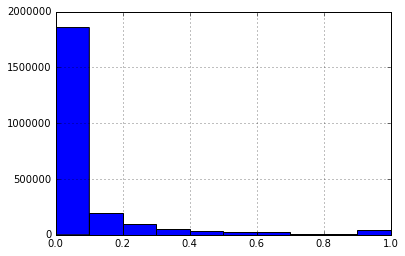

In [5]:
#pandas.read_csv('simple_xgb.csv')['is_duplicate'].hist()
pandas.read_csv('submit_clique.csv')['is_duplicate'].hist()

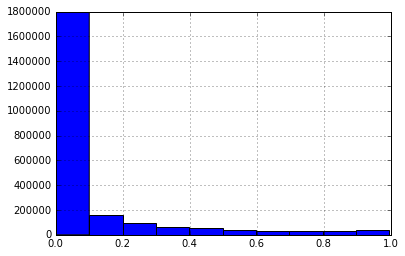

In [3]:
#pandas.read_csv('simple_xgb.csv')['is_duplicate'].hist()
pandas.read_csv('submit.csv')['is_duplicate'].hist()

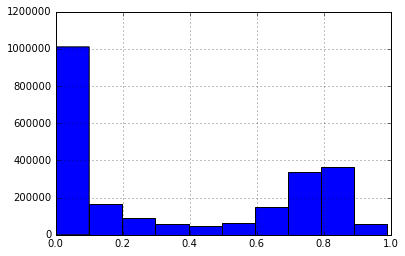

In [61]:
with open('test_preds2.pkl', 'rb') as f:                                                                                                                                                                                                                                   
    preds = pickle.load(f).astype(numpy.float32) 
pandas.Series(preds).hist()

In [5]:
with open('tfidf_val_%s.pkl' % 0, 'rb') as f:                                                                                                                                                                                                                     
    pred, val_y, val_w = pickle.load(f)
from sklearn.metrics import log_loss, roc_auc_score


In [6]:
tmp = pred.copy()
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression()
#clf.fit(tmp.reshape((-1, 1)), val_y, sample_weight=val_w)
#tmp = clf.predict_proba(tmp.reshape((-1, 1)))[:, 1]
tmp[tmp > 0.99] = 1

log_loss(val_y, tmp, sample_weight=val_w)

0.19898547644365724

In [18]:
pred = pandas.read_csv('../fasttext/pred.txt', header=None).values
log_loss(val_y, pred, sample_weight=val_w)

13.278409091127912

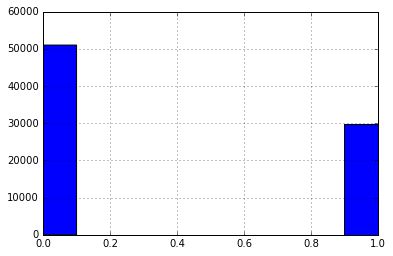

In [27]:
#pandas.read_csv('simple_xgb.csv')['is_duplicate'].hist()
pandas.read_csv('check_pred.csv')['1'].hist()

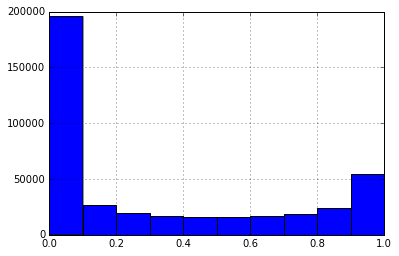

In [31]:
with open('tfidf_all_pred.pkl', 'rb') as f:                                                                                                                                                                                                                                 
    cross_pred = pickle.load(f)
pandas.Series(cross_pred).hist()

In [5]:
df = pandas.read_csv('count_tfidf_train.csv').head()
display(df[df.columns[0:10]])
display(df[df.columns[10:20]])
display(df[df.columns[20:30]])

,wn1,wn2,same_num,same_rate,won1,won2,same_orig1,same_orig2,same_orig_rate,wt1
0,7.0,6.0,6.0,0.461538,8.0,7.0,7.0,7.0,0.933333,65.259358
1,7.0,12.0,5.0,0.263158,7.0,12.0,5.0,5.0,0.526316,67.469286
2,8.0,6.0,2.0,0.142857,8.0,6.0,2.0,2.0,0.285714,58.900320
3,6.0,11.0,0.0,0.000000,7.0,13.0,0.0,0.0,0.000000,42.997395
4,11.0,6.0,3.0,0.176471,11.0,6.0,3.0,3.0,0.352941,125.660851


,wt2,max_tfidf,min_tfidf,sum_tfidf,rate_tfidf,same_w1,same_w2,tfidf_rate_dup,wi1,wi2
0,57.671622,18.587157,0.0,57.671622,0.469138,57.671622,57.671622,0.938276,55.965780,48.378044
1,106.946051,17.180476,0.0,44.543972,0.255390,44.543972,44.543972,0.510780,67.469286,106.946051
2,57.138165,8.587905,0.0,10.653007,0.091806,10.653007,10.653007,0.183612,58.900320,57.138165
3,139.461569,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,40.746074,122.170093
4,49.267795,11.120271,0.0,23.091994,0.132008,23.091994,23.091994,0.264016,125.660851,49.267795


,max_idf,min_idf,sum_idf,rate_idf,same_wi1,same_wi2,idf_rate_dup
0,11.464150,0.0,48.378044,0.463641,48.378044,48.378044,0.927281
1,17.180476,0.0,44.543972,0.255390,44.543972,44.543972,0.510780
2,8.587905,0.0,10.653007,0.091806,10.653007,10.653007,0.183612
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,11.120271,0.0,23.091994,0.132008,23.091994,23.091994,0.264016


In [6]:
pandas.read_csv('kernel_train.csv').head()

,word_match,tfidf_word_match
0,0.727273,0.772164
1,0.307692,0.361758
2,0.363636,0.355191
3,0.000000,0.000000
4,0.000000,0.000000


In [7]:
from tfidf import split_into_words, stops
df = pandas.read_csv('../data/train.csv').head()

a = split_into_words(df.ix[0, 'question1'])
a

['What', 'step', 'step', 'guide', 'invest', 'share', 'market', 'india']

In [8]:
b = split_into_words(df.ix[0, 'question2'])
b

['What', 'step', 'step', 'guide', 'invest', 'share', 'market']

In [9]:
set(a) and set(b)1

{'What', 'guide', 'invest', 'market', 'share', 'step'}

In [40]:
from doc2vec import split_into_words
import pickle
from gensim import models
model = models.Doc2Vec.load('doc2vec.model')
model.random.seed(0)

In [41]:
model.infer_vector(a)

array([ -1.81875541e-04,   6.18717808e-04,   5.21365646e-03,
        -6.14295527e-03,   1.08143117e-03,  -1.64027547e-03,
         7.16982363e-03,   7.60844850e-04,  -6.78666821e-03,
        -2.54031690e-03,   1.27213052e-03,   5.54397888e-03,
        -1.38536468e-03,  -3.77494143e-04,   5.33481920e-03,
         3.26417992e-03,   2.57931277e-03,  -2.96766590e-03,
        -3.01353936e-03,   2.00412865e-03,  -1.83219579e-03,
        -5.71574492e-04,   5.63886855e-03,   8.49032658e-04,
        -5.34692081e-04,   7.45595992e-03,  -3.69856739e-03,
         2.00613029e-03,  -4.23672516e-03,   1.48814288e-04,
         4.19094041e-03,   1.25302270e-03,   1.94236590e-03,
        -5.10311313e-03,  -5.62284607e-03,  -1.81633444e-03,
        -3.22822784e-03,  -2.46169674e-03,   1.34177099e-04,
        -8.41765571e-03,   6.81354606e-04,   3.12485825e-03,
        -5.51674457e-05,  -4.29285411e-03,   1.96470204e-03,
         9.43151244e-05,  -1.37371966e-03,  -5.85064245e-03,
        -9.36835189e-04,

In [18]:
with open('train_data.pkl', 'rb') as f:                                                                                                                                         
    x, y = pickle.load(f)  
x[0]

array([  1.15103181e-02,   2.41680130e-01,   9.57549810e-02,
        -8.63780454e-02,   1.73364580e-01,  -3.42527479e-02,
         5.91597632e-02,   5.13365939e-02,   1.58083923e-02,
        -2.57100701e-01,  -3.87183800e-02,   2.68857628e-01,
        -5.83597971e-03,   1.28652185e-01,  -7.99330941e-04,
        -6.06918074e-02,  -9.14915502e-02,  -1.01437658e-01,
         2.28860341e-02,   3.76210213e-02,  -2.36004367e-01,
         2.80179810e-02,   5.16127050e-02,   1.98815048e-01,
         1.24940798e-02,   1.56969413e-01,   1.37331426e-01,
        -6.38652891e-02,  -2.45207116e-01,   2.17812091e-01,
         3.43043745e-01,   1.51910409e-02,   1.48666397e-01,
        -1.23809762e-01,  -1.78878620e-01,   2.68304925e-02,
        -2.13893339e-01,  -3.17485146e-02,  -2.66614556e-01,
        -2.47698054e-01,  -4.17814078e-03,   3.92206728e-01,
         8.19401629e-03,  -1.54653698e-01,  -1.08624190e-01,
         5.42868711e-02,   2.85169333e-02,  -2.79078931e-01,
        -6.59277616e-03,

In [14]:
from sklearn.metrics import log_loss, roc_auc_score  
import pickle
import numpy

list_pred = []
with open('sparse_val.pkl', 'rb') as f:                                                                                                                                  
    pred, val_y, val_w = pickle.load(f)
    list_pred.append(pred * 0.2)
    
with open('tfidf_val.pkl', 'rb') as f:                                                                                                                                  
    pred, val_y, val_w = pickle.load(f)
    list_pred.append(pred * 0.8)
_score = log_loss(val_y, pred, sample_weight=val_w)                                                                                                                      
_score2 = - roc_auc_score(val_y, pred, sample_weight=val_w)
    
print(_score, _score2)

pred = numpy.sum(list_pred, axis=0)
    
_score = log_loss(val_y, pred, sample_weight=val_w)                                                                                                                      
_score2 = - roc_auc_score(val_y, pred, sample_weight=val_w)
    
print(_score, _score2)

0.29005128046 -0.886959058319
0.302202078165 -0.88690828738


In [16]:
from gensim import models
import pickle                                                                                                                                   
with open('count_corpus.pkl', 'rb') as f: 
    id_corpus = pickle.load(f)   
model = models.ldamulticore.LdaMulticore.load('lda.model')

In [25]:
aaa = model[id_corpus]
from gensim.matutils import corpus2csc

In [34]:
with open('train_sparse.pkl', 'rb') as f:                                                                                                                                       
    idf, count, tfidf = pickle.load(f)                                                                                                                                          
                                                                                                                                                             
with open('test_sparse.pkl', 'rb') as f:                                                                                                                                        
    idf_t, count_t, tfidf_t = pickle.load(f)                                                                                                                                          


cols = [26580,122844,51880,133005,113348,24214,4964,119336,34094,27869] # tfidf
with open('train_tfidf_10.pkl', 'wb') as f:                                                                                                                             
    pickle.dump(tfidf[:, cols], f, -1)                                                                                                           
with open('test_tfidf_10.pkl', 'wb') as f:                                                                                                                              
    pickle.dump(tfidf_t[:, cols], f, -1)  


cols = [26580,51880,122844,133005,113348,4964,24214,119336,34094,27869] # idf
with open('train_idf_10.pkl', 'wb') as f:                                                                                                                             
    pickle.dump(idf[:, cols], f, -1)                                                                                                           
with open('test_idf_10.pkl', 'wb') as f:                                                                                                                              
    pickle.dump(idf_t[:, cols], f, -1)  

cols = [26580,122844,51880,133005,113348,24214,4964,119336,34094,27869] #cnt
with open('train_cnt_10.pkl', 'wb') as f:                                                                                                                             
    pickle.dump(count[:, cols], f, -1)                                                                                                           
with open('test_cnt_10.pkl', 'wb') as f:                                                                                                                              
    pickle.dump(count_t[:, cols], f, -1)  

In [13]:
import pickle

with open('train_sparse.pkl', 'rb') as f:                                                                                                                                       
    idf, count, tfidf = pickle.load(f)                                                                                                                                          
                                                                                                                                                             
with open('test_sparse.pkl', 'rb') as f:                                                                                                                                        
    idf_t, count_t, tfidf_t = pickle.load(f)
num = 100
from features_idf import FEATURE
cols = FEATURE[:num]
print(cols)
with open('train_idf_%s.pkl'%num, 'wb') as f:                                                                                                                             
    pickle.dump(idf[:, cols], f, -1)                                                                                                           
with open('test_idf_%s.pkl'%num, 'wb') as f:                                                                                                                              
    pickle.dump(idf_t[:, cols], f, -1)  

from features_tfidf import FEATURE
cols = FEATURE[:num]
print(cols)
with open('train_tfidf_%s.pkl'%num, 'wb') as f:                                                                                                                             
    pickle.dump(tfidf[:, cols], f, -1)                                                                                                           
with open('test_tfidf_%s.pkl'%num, 'wb') as f:                                                                                                                              
    pickle.dump(tfidf_t[:, cols], f, -1)  

from features_cnt import FEATURE
cols = FEATURE[:num]
print(cols)
with open('train_cnt_%s.pkl'%num, 'wb') as f:                                                                                                                             
    pickle.dump(count[:, cols], f, -1)                                                                                                           
with open('test_cnt_%s.pkl'%num, 'wb') as f:                                                                                                                              
    pickle.dump(count_t[:, cols], f, -1)  

[26580, 51880, 122844, 133005, 113348, 4964, 24214, 119336, 34094, 27869, 151570, 110027, 105166, 9634, 144798, 64016, 136132, 2404, 88020, 96086, 75766, 131703, 481, 114202, 79158, 52722, 131385, 124991, 18807, 116422, 66961, 115690, 54548, 132401, 26236, 130895, 3493, 84314, 134389, 46786, 88082, 156306, 7850, 9286, 150661, 145218, 20039, 112053, 122115, 113955, 135780, 42555, 2439, 133977, 77617, 35335, 137283, 4715, 101689, 49057, 26492, 123365, 41381, 10367, 100407, 19244, 105289, 17498, 128175, 107758, 52354, 6703, 134624, 49896, 91284, 119805, 114459, 27393, 145288, 40475, 34664, 44920, 40067, 122031, 78713, 139835, 126113, 4180, 73330, 88513, 66660, 70303, 47522, 55968, 70036, 125151, 126820, 145279, 103231, 34840]
[26580, 122844, 51880, 133005, 113348, 24214, 4964, 119336, 34094, 27869, 151570, 110027, 105166, 9634, 144798, 136132, 96086, 64016, 116422, 88020, 2404, 75766, 79158, 114202, 131385, 131703, 66961, 52722, 481, 18807, 113955, 26236, 9286, 20039, 124991, 126113, 5454

In [ ]:
from train_sparse import feat
with open('train_sparse.pkl', 'rb') as f:                                                                                                                                       
    idf, count, tfidf = pickle.load(f)                                                                                                                                          
    x_train = feat(idf, count, tfidf)                                                                                                                                           
with open('test_sparse.pkl', 'rb') as f:                                                                                                                                        
    idf, count, tfidf = pickle.load(f)                                                                                                                                          
    x_test = feat(idf, count, tfidf)

num = 900
from features_tic import FEATURE as feat_tic
cols = feat_tic[:num]
with open('train_tic_%s.pkl'%num, 'wb') as f:                                                                                                                             
    pickle.dump(x_train[:, cols], f, -1)                                                                                                           
with open('test_tic_%s.pkl'%num, 'wb') as f:                                                                                                                              
    pickle.dump(x_test[:, cols], f, -1)  

In [3]:
from train_sparse import feat
from scipy.sparse import vstack
import pickle
with open('train_sparse.pkl', 'rb') as f:                                                                                                                                       
    idf, count, tfidf = pickle.load(f)                                                                                                                                          
    x_train = feat(idf, count, tfidf)                                                                                                                                           
with open('test_sparse.pkl', 'rb') as f:                                                                                                                                        
    idf, count, tfidf = pickle.load(f)                                                                                                                                          
    x_test = feat(idf, count, tfidf)
    
num = 300
from features_tic import FEATURE as feat_tic
cols = feat_tic[:1000]
train_num = x_train.shape[0]

data = vstack([x_train, x_test])[cols]
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=0)
data = svd.fit_transform(data)

with open('train_svd_300.pkl', 'wb') as f:                                                                                                                             
    pickle.dump(data[:train_num], f, -1)                                                                                                           
with open('test_svd_300.pkl', 'wb') as f:                                                                                                                              
    pickle.dump(data[train_num:], f, -1)  

In [5]:
import pickle
with open('../fasttext/fast_vec.pkl', 'rb') as f:                                                                                                                               
    x = pickle.load(f)                                                                                                                                                          
x.values[0, 0].shape

(100,)

In [42]:
x = pandas.read_csv('lda_train.csv').values    

In [37]:
with open('w2v_vec.pkl', 'rb') as f:                                                                                                                                        
    x = pickle.load(f)

In [38]:
x.head(10)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,qid,question
0,-0.753482,2.112821,1.541977,0.384532,-1.733534,-0.771243,2.167940,2.360244,1.390762,-0.609121,...,0.687771,-0.923339,-0.408292,-1.094888,-0.028545,-1.800868,0.472717,-0.303114,TRAIN_1,What is the step by step guide to invest in sh...
1,-0.956594,2.074332,1.658960,0.320862,-1.786352,-0.755732,2.054064,2.722501,1.285282,-0.500946,...,0.491219,-0.762877,-0.423197,-1.112721,0.166076,-1.863838,0.173651,-0.336546,TRAIN_2,What is the step by step guide to invest in sh...
2,0.544719,3.231976,0.576973,0.722695,-2.168282,-0.828015,0.461673,-0.501551,0.332202,-0.328026,...,0.757782,-0.537776,-0.497989,-0.010773,0.333771,0.643025,2.001470,0.172653,TRAIN_3,What is the story of Kohinoor (Koh-i-Noor) Dia...
3,-0.444889,1.283303,1.463730,0.821469,-2.218949,1.010528,2.163989,0.139762,0.479004,-1.334586,...,0.191449,-1.086113,-0.732761,-0.419494,-0.170618,0.344662,0.826588,0.112127,TRAIN_4,What would happen if the Indian government sto...
4,0.104251,0.682866,3.744572,-1.676384,-1.019216,-0.250608,1.847591,2.621600,3.061529,-0.201209,...,-0.077352,-1.857409,-0.135384,-0.361958,0.544596,2.018030,1.531559,-1.001816,TRAIN_5,How can I increase the speed of my internet co...
5,-0.365464,1.316338,1.825939,-1.379857,-1.645854,0.206913,1.254941,2.169559,1.579756,-0.274921,...,0.105328,-1.493562,-0.308346,0.403283,0.460843,0.994330,0.591542,-1.537392,TRAIN_6,How can Internet speed be increased by hacking...
6,0.607347,-1.415573,2.553559,0.179922,-1.341654,-0.312622,2.913521,3.002870,1.459306,-1.549989,...,-2.875664,-1.776991,2.447775,1.800614,0.308203,2.099252,0.211141,-0.492476,TRAIN_7,Why am I mentally very lonely? How can I solve...
7,-4.535946,1.406546,1.319320,0.553602,-1.487189,-1.724053,-1.572403,-0.870542,0.556147,-3.059573,...,-0.117060,0.981680,1.035540,3.754642,1.813456,4.878971,-1.030611,-1.428055,TRAIN_8,Find the remainder when [math]23^{24}[/math] i...
8,-0.817430,0.728057,0.151679,-0.381106,-2.543815,1.784946,0.634394,0.555046,1.035987,-1.863627,...,-0.015081,-0.095038,0.413338,1.160291,-0.229294,1.243589,1.772132,-0.555069,TRAIN_9,"Which one dissolve in water quikly sugar, salt..."
9,-0.598184,0.276333,0.615840,0.180498,-2.800181,1.771563,0.454006,1.642980,1.160368,-2.771664,...,-0.135863,-1.823808,-0.255493,-0.190494,-0.129023,-0.794784,1.624542,-1.295400,TRAIN_10,Which fish would survive in salt water?


In [5]:
import pickle
with open('corpus.pkl', 'rb') as f:                                                                                                                                             
    sentences = pickle.load(f)                                                                                                                                                  
    sentences = [row.words for row in sentences]

In [8]:
words = []
for row in sentences:
    words += row
words = list(set(words))

In [9]:
pandas.Series(words).to_csv('../fasttext/words.csv', index=False, header=False)

In [34]:
from gensim import models     
import numpy
model = models.Doc2Vec.load('word2vec.model')      
vec = []
for word in sentences[7]:
        try:                                                                                                                                                                        
            vec.append(model.wv[word])                                                                                                                                                  
        except KeyError:                                                                                                                                                            
            continue
numpy.mean(vec, axis=0)

array([-4.53594589,  1.406546  ,  1.3193202 ,  0.55360174, -1.48718858,
       -1.72405291, -1.57240319, -0.87054241,  0.55614716, -3.05957317,
        1.25142968, -1.34468687, -0.11706029,  0.98167962,  1.0355401 ,
        3.75464201,  1.81345582,  4.87897062, -1.03061092, -1.42805493], dtype=float32)

In [4]:
import pickle
with open('train_svd_300.pkl', 'rb') as f:                                                                                                                                      
    x = pickle.load(f)
x.shape

(1000, 300)

In [4]:
df = pandas.read_csv('../data/train.csv')
df[df['question1'] == df['question2']]

,id,qid1,qid2,question1,question2,is_duplicate


In [144]:
from subject_object_extraction import findSVOs
doc1 = nlp("What is your review of Kendriya Vidyalaya Jhabua")
for token in doc1.ents:
    print(token.lemma_)
print(findSVOs(aaa))

kendriya vidyalaya jhabua
[]


In [28]:
import spacy
#nlp = spacy.load('en')
doc1 = nlp(u"Dog")
for token in doc1:
    print(dir(token))
    print(token.pos_)
    break
    #print(token, token.pos_, token.dep_, token.stem_)
print('----')
for token in doc1.ents:
    print(token)

['__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', 'ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_iob', 'ent_iob_', 'ent_type', 'ent_type_', 'has_vector', 'head', 'i', 'idx', 'is_alpha', 'is_ancestor_of', 'is_ascii', 'is_bracket', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_space', 'is_stop', 'is_title', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex_id', 'like_email', 'like_num', 'like_url', 'lower', 'lower_', 'n_lefts', 'n_rights', 'nbor', 'norm', 'norm_', 'orth', 'orth_', 'pos', 'pos_', 'prefix', 'prefix_', 'prob', 'rank', 'repvec', 'right_edge', 'rights', 'shape', 'shape_', 'similarity', 

In [25]:
import spacy
#nlp = spacy.load('en')
nlp.vocab['dog'

AttributeError: 'spacy.lexeme.Lexeme' object has no attribute 'tag'

In [127]:
import spacy
#nlp = spacy.load('en')
doc1 = nlp(u"hair?")
print(doc1[0].pos_)
for token in doc1:
    print(dir(token))
    print(token.pos_)
    break
    #print(token, token.pos_, token.dep_, token.stem_)
print('----')
for token in doc1.ents:
    print(token)

NOUN
['__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', 'ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_iob', 'ent_iob_', 'ent_type', 'ent_type_', 'has_vector', 'head', 'i', 'idx', 'is_alpha', 'is_ancestor_of', 'is_ascii', 'is_bracket', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_space', 'is_stop', 'is_title', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex_id', 'like_email', 'like_num', 'like_url', 'lower', 'lower_', 'n_lefts', 'n_rights', 'nbor', 'norm', 'norm_', 'orth', 'orth_', 'pos', 'pos_', 'prefix', 'prefix_', 'prob', 'rank', 'repvec', 'right_edge', 'rights', 'shape', 'shape_', 'similari

In [23]:
nlp.vocab['good'].sentiment

AttributeError: 'spacy.lexeme.Lexeme' object has no attribute 'sentiment'

In [14]:
import pickle
with open('train_svo.pkl', 'rb') as f:                                                                                                                                          
    x = pickle.load(f) 

In [18]:
pandas.DataFrame(x).describe().T

,count,mean,std,min,25%,50%,75%,max
0,404290.0,0.296765,0.524532,0.0,0.000000,0.000000,1.000000,5.000000
1,404290.0,1.228363,2.365886,0.0,0.000000,0.000000,2.000000,53.000000
2,404290.0,2.169517,3.020794,0.0,0.000000,1.000000,3.000000,53.000000
3,404290.0,38.448495,32.137649,1.0,15.000000,30.000000,52.000000,1086.000000
4,404290.0,0.734720,0.099341,0.0,0.667698,0.724316,0.794708,0.998073
5,404290.0,38.409399,32.113186,1.0,15.000000,30.000000,52.000000,1086.000000
6,404290.0,0.459178,0.584698,0.0,0.000000,0.000000,1.000000,4.000000
7,404290.0,0.422222,0.510807,0.0,0.000000,0.000000,1.000000,5.000000
8,404290.0,0.292703,0.507895,0.0,0.000000,0.000000,1.000000,6.000000
9,404290.0,0.017933,0.135602,0.0,0.000000,0.000000,0.000000,3.000000


In [29]:
import pickle
with open('../sense2vec/train_sense.pkl', 'rb') as f:                                                                                                                                          
    x = pickle.load(f) 

FileNotFoundError: [Errno 2] No such file or directory: '../sense2vec/train_sense.pkl'

In [57]:
df = pandas.read_csv('../data/train.csv')
df_pos = df[df['is_duplicate'] == 1]
df_neg = df[df['is_duplicate'] == 0]

In [109]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [110]:
edges = [tuple(x) for x in df_pos[['question1', 'question2']].values]

In [111]:
import networkx as nx
G = nx.Graph()

In [112]:
df1 = df[['qid1', 'question1']]                                                                                                                                                                                                                                             
df1.columns = ['qid', 'question']                                                                                                                                                                                                                                           
df2 = df[['qid2', 'question2']]                                                                                                                                                                                                                                             
df2.columns = ['qid', 'question']
df_que = pandas.concat([df1, df2], ignore_index=True)                                                                                                                                                                                                                       
df_que = df_que.drop_duplicates().fillna('').sort_values('qid') 

In [113]:
map_que = df_que.set_index('qid').to_dict()['question']

In [114]:
edges = [tuple(x) for x in df_pos[['qid1', 'qid2']].values]
G.add_edges_from(edges)

In [115]:
list_comp = sorted(nx.connected_components(G), key = len, reverse=True)

In [116]:
set_edges = set(edges)

In [117]:
list_ret = []
cnt = -1
for comp in list_comp:
    cnt += 1
    for q1 in comp:
        for q2 in comp:
            if q1 == q2:
                continue
            tmp = [cnt, q1, q2, map_que[q1], map_que[q2], (q1, q2) in set_edges, (q2, q1) in set_edges, 1]
            list_ret.append(tmp)

In [118]:
df_pos_inc = pandas.DataFrame(list_ret, columns=['cid', 'qid1', 'qid2', 'question1', 'question2', 'is_in1', 'is_in2', 'is_duplicate'])

In [119]:
df_pos_inc.to_csv('../data/train_increase_pos_orig.csv', index=False)

In [120]:
df_new = pandas.concat([df_neg[['qid1', 'qid2', 'question1', 'question2', 'is_duplicate']],
df_pos_inc[['qid1', 'qid2', 'question1', 'question2', 'is_duplicate']]], ignore_index=True)

In [121]:
df_new['id'] = numpy.arange(df_new.shape[0])
df_new[df.columns.values].to_csv('../data/train_increase_orig.csv', index=False)

In [32]:
df = pandas.read_csv('../data/train.csv')

In [20]:
df1 = df[['qid1', 'question1']]                                                                                                                                                                                                                                             
df1.columns = ['qid', 'question']                                                                                                                                                                                                                                           
df2 = df[['qid2', 'question2']]                                                                                                                                                                                                                                             
df2.columns = ['qid', 'question']
df_que = pandas.concat([df1, df2], ignore_index=True)                                                                                                                                                                                                                       
_df_que = df_que.drop_duplicates().fillna('').sort_values('qid')['question'].values.tolist()

In [22]:
df = pandas.read_csv('../data/test.csv')
df1 = df[['question1']]                                                                                                                                                                                                                                             
df1.columns = ['question']                                                                                                                                                                                                                                           
df2 = df[[ 'question2']]                                                                                                                                                                                                                                             
df2.columns = [ 'question']
df_que = pandas.concat([df1, df2], ignore_index=True)                                                                                                                                                                                                                       
df_que = df_que.drop_duplicates().fillna('')['question'].values.tolist()

In [30]:
print(len(_df_que), len(df_que), len(_df_que) + len(df_que))
aaa = set(df_que + _df_que)
print(len(aaa))

537933 4363832 4901765
4789032


In [27]:
print('aaa')

aaa


In [59]:
with open('tfidf_all_pred7.pkl', 'rb') as f:
    x = pickle.load(f).astype(numpy.float32)
df['pred'] = x

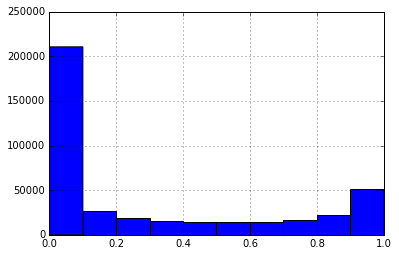

In [60]:
pandas.Series(x).hist()

In [61]:
avg_pos = df[df['is_duplicate'] == 1]['pred'].mean()
avg_neg = df[df['is_duplicate'] == 0]['pred'].mean()

In [36]:
import networkx as nx
from itertools import combinations
df_pos = df[df['is_duplicate'] == 1]
GP = nx.Graph()
edges = [tuple(x) for x in df_pos[['question1', 'question2', 'pred']].values]
map_score = dict(((x[0], x[1]), x[2]) for x in df_pos[['question1', 'question2', 'pred']].values)
GP.add_weighted_edges_from(edges)
list_comp = nx.connected_components(GP)
add_edges = []
for comp in list_comp:
    if len(comp) < 3:
        continue
    tmp = []
    for q1, q2 in combinations(comp, 2):
        if GP.has_edge(q1, q2):
            tmp.append(GP[q1][q2]['weight'])
    val = numpy.mean(tmp)
            
    for q1, q2 in combinations(comp, 2):
        if not GP.has_edge(q1, q2):
            add_edges.append((q1, q2, val))
add_edges = list(set(add_edges))

In [62]:
import networkx as nx
G = nx.Graph()

edges = [tuple(x) for x in df[['question1', 'question2', 'pred']].values]
G.add_weighted_edges_from(edges)
#G.add_weighted_edges_from(add_edges)
map_score = dict(((x[0], x[1]), x[2]) for x in df[['question1', 'question2', 'pred']].values)
map_dup = dict(((x[0], x[1]), x[2]) for x in df[['question1', 'question2', 'is_duplicate']].values)

In [64]:
cliques = sorted(list(nx.find_cliques(G)), key=len)

In [65]:
import copy
from itertools import combinations
cnt = 0
map_result = copy.deepcopy(map_score)


for cli in cliques:
    if len(cli) < 3:
        continue
    keys = {}
    for q1, q2 in combinations(cli, 2):
        if (q1, q2) in map_score:
            keys[q1, q2] = map_score[q1, q2]
        elif (q2, q1) in map_score:
            keys[q2, q1] = map_score[q2, q1]

    val_max = numpy.max(list(keys.values()))
    val_min = numpy.min(list(keys.values()))
    val_avg = numpy.mean(list(keys.values()))
    if val_avg > 0.4:#avg_pos:
        val = val_max
    elif val_avg > 0.01:
        val = val_avg
    else:
        val = val_min
    keys = {k: numpy.max([val, map_result[k]]) for k in keys}
    map_result.update(keys)

In [66]:
list_res = []
for key, new in map_result.items():
    #new = map_result[key]
    try:
        label = map_dup[key]
    except:
        continue
    pred = map_score[key]
    new_pred = new
    list_res.append((label, pred, new_pred))
aaa = pandas.DataFrame(list_res, columns=['label', 'pred', 'new'])

In [67]:
from tfidf_k import calc_weight
from sklearn.metrics import log_loss, roc_auc_score
sw = calc_weight(aaa['label'].values)
print(roc_auc_score(aaa['label'].values, aaa['pred'].values, sample_weight=sw))
print(log_loss(aaa['label'].values, aaa['pred'].values, sample_weight=sw))
print(roc_auc_score(aaa['label'].values, aaa['new'].values, sample_weight=sw))
print(log_loss(aaa['label'].values, aaa['new'].values, sample_weight=sw))

0.960261383037
0.183190619435
0.967281116708
0.168378018963


In [19]:
0.958738019258
0.194830278204
0.96586224807
0.188850774122

(404290, 7)

In [ ]:
0.951688130892
0.209354354033
0.960610169955
0.196266842753

0.951688130892
0.209354354033
0.961782926417
0.199606823834

In [13]:
import copy
cnt = 0
map_aaa = []
map_result = copy.deepcopy(map_score)
for (q1, q2), score in map_score.items():
    try:
        G.remove_edge(q1, q2)
    except:
        print(q1, q2)
    if nx.has_path(G, q1, q2):
        cnt += 1
        paths = nx.shortest_path(G, q1, q2)
        list_scores = []
        if len(paths) >= 4:
            continue
        
        for i in range(len(paths) - 1):
            try:
                list_scores.append(map_result[paths[i], paths[i+1]])
            except:
                list_scores.append(map_result[paths[i+1], paths[i]])
        val_max = numpy.max(list_scores)
        val_min = numpy.min(list_scores)
        val_avg = numpy.mean(list_scores)
        if val_avg > 0.5:
            val = val_max
        elif val_avg < 0.01:
            val = val_min
        else:
            val = val_max                
                  
        new_score = numpy.max((score, val))
        map_result[q1, q2] = new_score
    else:
        pass
    G.add_edge(q1,q2, weight=score)
print(cnt)

KeyboardInterrupt: 

In [4]:
df = pandas.read_csv('../data/test.csv')
submit = pandas.read_csv('submit.csv')
df['pred'] = submit['is_duplicate'].values

df2 = pandas.read_csv('../data/train.csv')
pos_rate = df2['is_duplicate'].sum() / df2.shape[0]
df2['pred'] = df2['is_duplicate'] / pos_rate * 0.165


import networkx as nx
from itertools import combinations
G = nx.Graph()

edges = [tuple(x) for x in df[['question1', 'question2', 'pred']].values]
G.add_weighted_edges_from(edges)
map_score = dict(((x[0], x[1]), x[2]) for x in df[['question1', 'question2', 'pred']].values)

edges = [tuple(x) for x in df2[['question1', 'question2', 'pred']].values]
G.add_weighted_edges_from(edges)
map_score2 = dict(((x[0], x[1]), x[2]) for x in df2[['question1', 'question2', 'pred']].values)

map_score.update(map_score2)

import copy
cnt = 0
map_result = copy.deepcopy(map_score)
for cli in nx.find_cliques(G):
    if len(cli) < 3:
        continue
    keys = {}
    for q1, q2 in combinations(cli, 2):
        if (q1, q2) in map_score:
            keys[q1, q2] = map_score[q1, q2]
        elif (q2, q1) in map_score:
            keys[q2, q1] = map_score[q2, q1]
        elif (q1, q2) in map_score2:
            keys[q1, q2] = map_score2[q1, q2]
        elif (q2, q1) in map_score2:
            keys[q2, q1] = map_score2[q2, q1]
            
    val_max = numpy.max(list(keys.values()))
    val_min = numpy.min(list(keys.values()))
    val_avg = numpy.mean(list(keys.values()))
    if val_avg > 0.5:
        val = val_max
    elif val_avg < 0.01:
        val = val_min
    else:
        val = val_max
    keys = {k: val for k in keys}
    map_result.update(keys)


In [5]:
list_val = []
for q1, q2 in df[['question1', 'question2']].values:
    list_val.append(map_result[q1, q2])
submit['is_duplicate'] = list_val
submit.to_csv('submit_clique.csv', index=False)

In [14]:
map_dup = dict(((x[0], x[1]), x[2]) for x in df2[['question1', 'question2', 'is_duplicate']].values)
list_res = []
for key, new in map_score2.items():
    new = map_result[key]
    try:
        label = map_dup[key]
    except:
        continue
    pred = map_score2[key]
    new_pred = new
    list_res.append((label, pred, new_pred))

aaa = pandas.DataFrame(list_res, columns=['label', 'pred', 'new'])
from tfidf_k import calc_weight
from sklearn.metrics import log_loss, roc_auc_score
sw = calc_weight(aaa['label'].values)
print(roc_auc_score(aaa['label'].values, aaa['pred'].values, sample_weight=sw))
print(log_loss(aaa['label'].values, aaa['pred'].values, sample_weight=sw))
print(roc_auc_score(aaa['label'].values, aaa['new'].values, sample_weight=sw))
print(log_loss(aaa['label'].values, aaa['new'].values, sample_weight=sw))

1.0
0.132888890229
0.992395345865
0.12599315576


In [11]:
aaa

,label,pred,new
